In [ ]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Plot graphs

import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset_(X, y, axes, x1_index=0, x2_index=1, labels=[]):
    for item, style in zip(set(y), ["bs", "g^", "yo", "cv", "m<", "r<"]):
        if item == -1: # style for wrong class
            style = "rx"
        plt.plot(X[:, 0][y==item], X[:, 1][y==item], style)
    if axes != []:
        plt.axis(axes)
    plt.grid(True, which='both')
    if labels != []:
        plt.xlabel(labels[x1_index], fontsize=12)
        plt.ylabel(labels[x2_index], fontsize=12)
    else:
        plt.xlabel(r"$x_1$", fontsize=12)
        plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
    return

def plot_dataset(X, y, title, x1_index=0, x2_index=1, labels=[]):
    plot_dataset_(X, y, [], x1_index=x1_index, x2_index=x2_index, labels=labels)
    plt.title(title)
    plt.show()
    return

def plot_predictions(clf, axes, confidence=True, encoder=None):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    if encoder is None:
      y_pred = clf.predict(X_).reshape(x0.shape)
    else:
      y_pred = clf.predict(X_)#.reshape(x0.shape)
      #y_pred = encoder.inverse_transform(np.around(y_pred)).reshape(x0.shape)#.flatten()
      y_pred = encoder.inverse_transform(y_pred).reshape(x0.shape)#.flatten()
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plot confidence scores for samples
    if confidence:
        y_decision = clf.decision_function(X_).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    return

def plot_classification_results(X, y, clf=None, predicted_y=[], axes=[], confidence=False, encoder=None, title=""):
    if axes == []:
        for i in [0,1]:
            min_x = min(X[:,i])
            max_x = max(X[:,i])
            delta_x = (max_x-min_x)/20
            axes += [min_x-delta_x, max_x+delta_x]
    if clf != None:
        plot_predictions(clf, axes, confidence=confidence, encoder=encoder)
    #if predicted_y!= []:
    if len(predicted_y)!= 0:
        #res_y = np.array([el1 if (el1==el2) else -1 for el1,el2 in zip(y, predicted_y)])
        res_y = (y == predicted_y)
        res_y = np.array([el1 if el2 else -1 for el1,el2 in zip(y, res_y)])
        plot_dataset_(X, res_y, axes)
    else:
        plot_dataset_(X, y, axes)
    plt.title(title)
    plt.show()
    return

def plot_confusion_matrix(real_labels, predicted_labels, normalize=False, labels=[]):
    # Calculate confusion matrix
    c_mat = confusion_matrix(real_labels, predicted_labels)

    # Normalize confusion matrix
    cbar_label = "Number of samples"
    if normalize:
        c_mat = c_mat/c_mat.sum(axis=1)
        cbar_label = "Ratio of samples"

    # Plot the heatmap
    sns.heatmap(c_mat, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar_kws={'label': cbar_label}, xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    return

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(history, metric, val_prefix="val_"):
  label = metric.capitalize()
  plt.plot(history.history[metric])
  plt.plot(history.history[val_prefix+metric])
  plt.title('Model ' + label)
  plt.ylabel(label)
  plt.xlabel('Epoch')
  legend_loc = 'lower right' if metric == 'accuracy' else 'upper right'
  plt.legend(['train', 'test'], loc=legend_loc)
  plt.show()
  return

def plot_confusion_matrix(real_labels, predicted_labels, normalize=False, labels=[]):
    # Calculate confusion matrix
    c_mat = confusion_matrix(real_labels, predicted_labels)

    # Normalize confusion matrix
    cbar_label = "Number of samples"
    if normalize:
        c_mat = c_mat/c_mat.sum(axis=1)
        cbar_label = "Ratio of samples"

    # Plot the heatmap
    sns.heatmap(c_mat, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar_kws={'label': cbar_label}, xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    return

In [ ]:
from keras.datasets import fashion_mnist

# images == x ////////// labels == y

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [ ]:
IMAGE_SHAPE = (32, 32, 3)
IMG_SIZE = IMAGE_SHAPE[:-1]

classes = {0: "t-shirt/top", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal",6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

from keras.utils import img_to_array

resize = keras.layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])

x_train = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in x_train])
x_test = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in x_test])
print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the x_train and y_train into training and validation datasets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
train_dataset = [(x, y) for x, y in zip(x_train, y_train) if y < len(classes)]
val_dataset = [(x, y) for x, y in zip(x_val, y_val) if y < len(classes)]
test_dataset = [(x, y) for x, y in zip(x_test, y_test) if y < len(classes)]

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

48000 12000 10000


In [ ]:
import gc

gc.collect()

42

In [ ]:
# Extracting images, validation and labels correctly from train_dataset, val_dataset and test_dataset
train_images = np.array([x[0] for x in train_dataset])
train_labels = np.array([x[1] for x in train_dataset])
val_images = np.array([x[0] for x in val_dataset])
val_labels =  np.array([x[1] for x in val_dataset])
test_images = np.array([x[0] for x in test_dataset])
test_labels = np.array([x[1] for x in test_dataset])

class: trouser


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
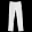

In [ ]:
imageIndex = 27
print(f"class: {classes[train_labels[imageIndex]]}")
train_images[imageIndex]

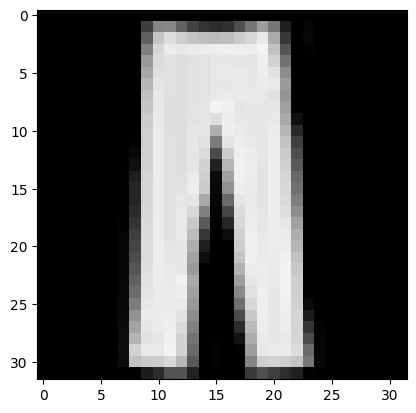

In [ ]:
from keras.utils import img_to_array

resize = keras.layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])

train_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in train_images])
val_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in val_images])
test_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in test_images])

plt.imshow(train_images[imageIndex])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

nom_encoder = OneHotEncoder()

# train transformer on train data, and transform them
enc_y_train = nom_encoder.fit_transform(y_train.reshape(-1, 1)).todense()
# use trained transformer to trasform test data
enc_y_test = nom_encoder.transform(y_test.reshape(-1, 1)).todense()

# print a sample label from training set
imageIndex = 27
print("This is the native " + str(imageIndex) + "-th train label: " + str(y_train[imageIndex]))
print("This is the one-hot encoding of the " + str(imageIndex) + "-th train label: " + str(enc_y_train[imageIndex]))

This is the native 27-th train label: 1
This is the one-hot encoding of the 27-th train label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMAGE_SHAPE)
pretrained_model.trainable = False
pretrained_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
enc_train_labels = to_categorical(train_labels)
enc_test_labels = to_categorical(test_labels)
enc_val_labels = to_categorical(val_labels)

In [ ]:
import gc

gc.collect()

121

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 25ms/step - accuracy: 0.6698 - loss: 0.9931 - val_accuracy: 0.8273 - val_loss: 0.4747
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 13ms/step - accuracy: 0.8083 - loss: 0.5444 - val_accuracy: 0.8380 - val_loss: 0.4504
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8304 - loss: 0.4873 - val_accuracy: 0.8472 - val_loss: 0.4209
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8425 - loss: 0.4549 - val_accuracy: 0.8526 - val_loss: 0.4124
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8499 - loss: 0.4308 - val_accuracy: 0.8543 - val_loss: 0.4090
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8537 - loss: 0.4176 - val_accuracy: 0.8569 - val_loss: 0.3918
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8571 - loss: 0.4039 - val_accuracy: 0.8548 - val_loss: 0.4052
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8618 -

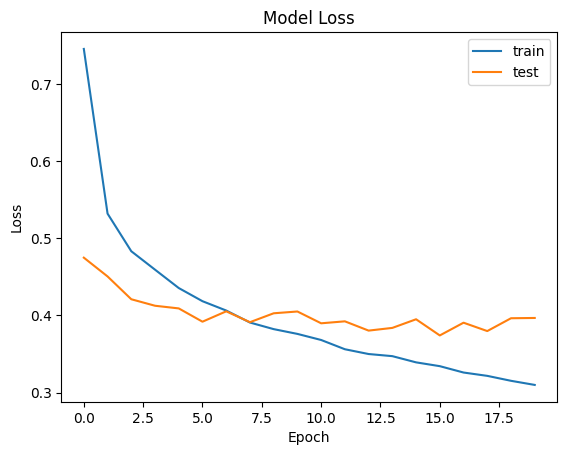

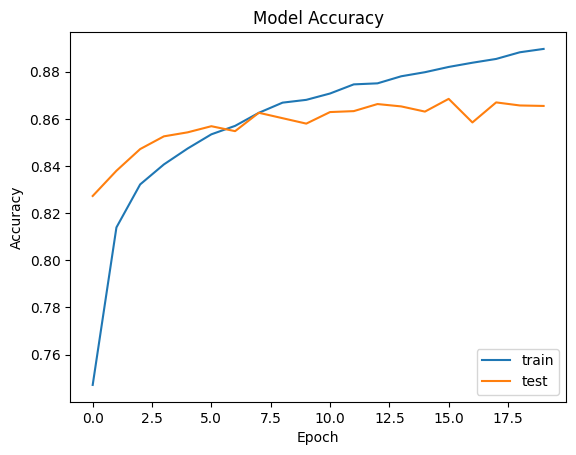

In [ ]:
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from keras import Sequential
from keras.optimizers import Adam

def get_model(pretrained_model, input_shape, num_classes):
    model = keras.Sequential()

    model.add(Input(shape=input_shape))
    model.add(pretrained_model)  # add pretrained_model as a blackbox
    model.add(Flatten(name='flatten'))
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


img_classes = enc_y_train[0].shape[1]

model = get_model(pretrained_model, IMAGE_SHAPE, img_classes)
history = model.fit(x_train, enc_y_train, epochs=20, batch_size=32, shuffle=True, validation_data=(x_test, enc_y_test), callbacks=[es])  #verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

# scale datasets
scaled_train_images = preprocess_input(train_images)
scaled_test_images = preprocess_input(test_images)
scaled_val_images = preprocess_input(val_images)

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.7772 - loss: 0.6620 - val_accuracy: 0.8334 - val_loss: 0.4464
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8323 - loss: 0.4734 - val_accuracy: 0.8421 - val_loss: 0.4239
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8474 - loss: 0.4360 - val_accuracy: 0.8512 - val_loss: 0.4068
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8536 - loss: 0.4123 - val_accuracy: 0.8562 - val_loss: 0.3987
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8651 - loss: 0.3878 - val_accuracy: 0.8582 - val_loss: 0.3880
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8662 - loss: 0.3758 - val_accuracy: 0.8510 - val_loss: 0.4086
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8699 - loss: 0.3646 - val_accuracy: 0.8594 - val_loss: 0.3896
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8769 -

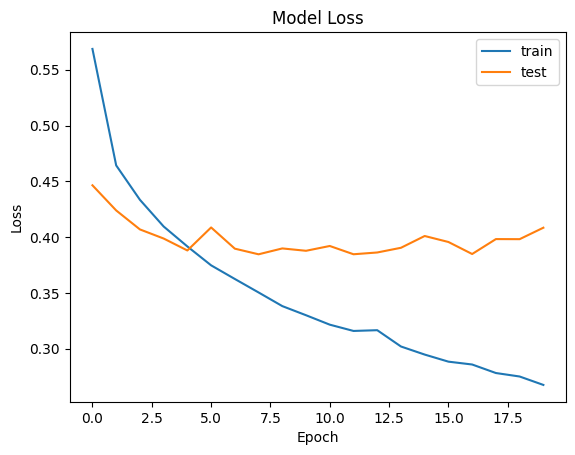

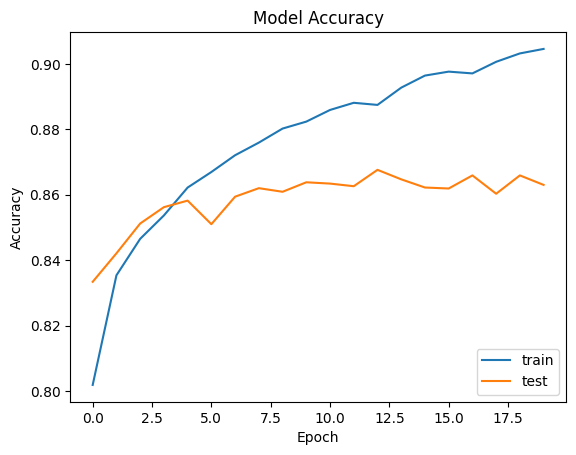

In [ ]:
history = model.fit(scaled_train_images, enc_train_labels, epochs=20, batch_size=32, shuffle=True, validation_data=(scaled_test_images, enc_test_labels), callbacks=[es])#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


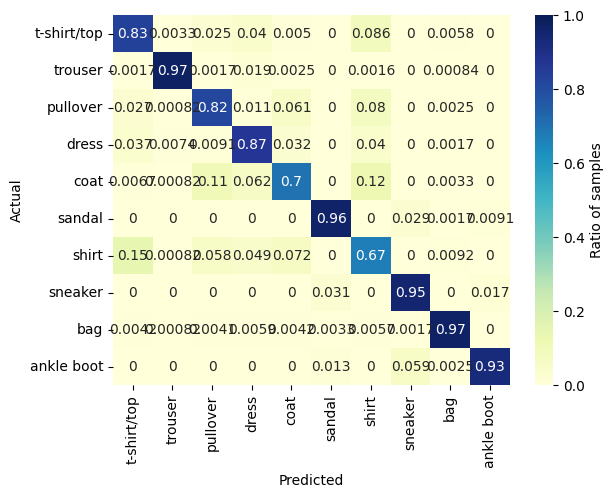

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1202
           1       0.99      0.97      0.98      1219
           2       0.80      0.82      0.81      1205
           3       0.82      0.87      0.85      1184
           4       0.80      0.70      0.75      1202
           5       0.95      0.96      0.96      1211
           6       0.67      0.67      0.67      1218
           7       0.91      0.95      0.93      1159
           8       0.97      0.97      0.97      1197
           9       0.97      0.93      0.95      1203

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [ ]:
# use trained classification model to predict classes on validation set
predicted = model.predict(scaled_val_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(val_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(val_labels, predicted))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


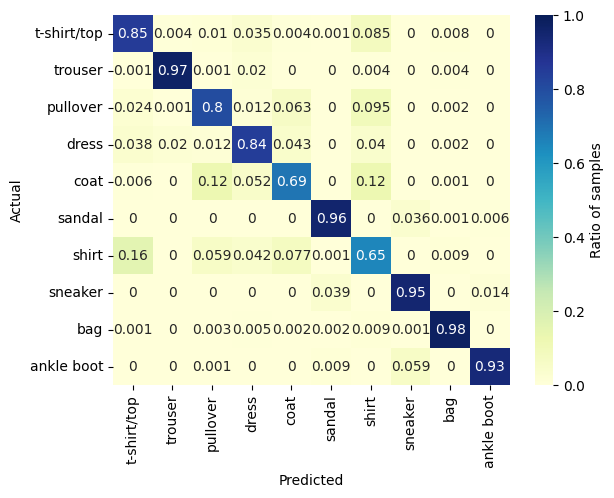

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.80      0.80      1000
           3       0.84      0.84      0.84      1000
           4       0.79      0.69      0.74      1000
           5       0.95      0.96      0.95      1000
           6       0.65      0.65      0.65      1000
           7       0.91      0.95      0.93      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# use trained classification model to predict classes on test set
predicted = model.predict(scaled_test_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(test_labels, predicted))

In [ ]:
import gc

gc.collect()

30668

In [ ]:
perf = {"model_name":[], "f1_macro": [], "accuracy": []}
for c in classes.values():
  perf["f1_"+c] = []

perf

{'model_name': [],
 'f1_macro': [],
 'accuracy': [],
 'f1_t-shirt/top': [],
 'f1_trouser': [],
 'f1_pullover': [],
 'f1_dress': [],
 'f1_coat': [],
 'f1_sandal': [],
 'f1_shirt': [],
 'f1_sneaker': [],
 'f1_bag': [],
 'f1_ankle boot': []}

In [ ]:
perf["model_name"].append("ResNet50")
perf["f1_macro"].append(metrics.f1_score(test_labels, predicted, average='macro'))
perf["accuracy"].append(metrics.accuracy_score(test_labels, predicted))
for c, s in zip(classes.values(), metrics.f1_score(test_labels, predicted, average=None)):
  perf["f1_"+c].append(s)

perf

{'model_name': ['ResNet50'],
 'f1_macro': [0.8626438196827463],
 'accuracy': [0.863],
 'f1_t-shirt/top': [np.float64(0.8190110417666827)],
 'f1_trouser': [np.float64(0.9724310776942355)],
 'f1_pullover': [np.float64(0.7982107355864811)],
 'f1_dress': [np.float64(0.8403779214321233)],
 'f1_coat': [np.float64(0.7377919320594479)],
 'f1_sandal': [np.float64(0.9527127924340468)],
 'f1_shirt': [np.float64(0.649402390438247)],
 'f1_sneaker': [np.float64(0.9270680372001958)],
 'f1_bag': [np.float64(0.9750499001996008)],
 'f1_ankle boot': [np.float64(0.9543823680164019)]}

In [ ]:
import json

with open('performances.json', 'w') as f:
  output = json.dumps(perf)
  f.write(output)

In [ ]:
with open('performances.json', 'r') as json_file:
  perf = json.load(json_file)

perf

{'model_name': ['ResNet50'],
 'f1_macro': [0.8626438196827463],
 'accuracy': [0.863],
 'f1_t-shirt/top': [0.8190110417666827],
 'f1_trouser': [0.9724310776942355],
 'f1_pullover': [0.7982107355864811],
 'f1_dress': [0.8403779214321233],
 'f1_coat': [0.7377919320594479],
 'f1_sandal': [0.9527127924340468],
 'f1_shirt': [0.649402390438247],
 'f1_sneaker': [0.9270680372001958],
 'f1_bag': [0.9750499001996008],
 'f1_ankle boot': [0.9543823680164019]}

In [ ]:
import gc

gc.collect()

3

**Application of VGG16 Model**

In [ ]:
from keras.datasets import fashion_mnist

# images == x ////////// labels == y

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [ ]:
IMAGE_SHAPE = (32, 32, 3)
IMG_SIZE = IMAGE_SHAPE[:-1]

classes = {0: "t-shirt/top", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal",6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

from keras.utils import img_to_array

resize = keras.layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])

x_train = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in x_train])
x_test = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in x_test])
print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the x_train and y_train into training and validation datasets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
train_dataset = [(x, y) for x, y in zip(x_train, y_train) if y < len(classes)]
val_dataset = [(x, y) for x, y in zip(x_val, y_val) if y < len(classes)]
test_dataset = [(x, y) for x, y in zip(x_test, y_test) if y < len(classes)]

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

48000 12000 10000


In [ ]:
import gc

gc.collect()

2574

In [ ]:
# Extracting images, validation and labels correctly from train_dataset, val_dataset and test_dataset
train_images = np.array([x[0] for x in train_dataset])
train_labels = np.array([x[1] for x in train_dataset])
val_images = np.array([x[0] for x in val_dataset])
val_labels =  np.array([x[1] for x in val_dataset])
test_images = np.array([x[0] for x in test_dataset])
test_labels = np.array([x[1] for x in test_dataset])

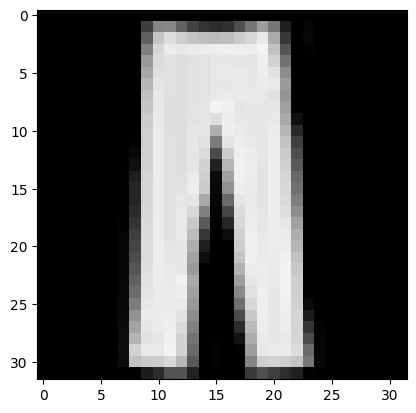

In [ ]:
from keras.utils import img_to_array

resize = keras.layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])

train_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in train_images])
val_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in val_images])
test_images = np.array([resize(img_to_array(i)).numpy().astype("uint8") for i in test_images])

plt.imshow(train_images[imageIndex])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

nom_encoder = OneHotEncoder()

# train transformer on train data, and transform them
enc_y_train = nom_encoder.fit_transform(y_train.reshape(-1, 1)).todense()
# use trained transformer to trasform test data
enc_y_test = nom_encoder.transform(y_test.reshape(-1, 1)).todense()

# print a sample label from training set
imageIndex = 27
print("This is the native " + str(imageIndex) + "-th train label: " + str(y_train[imageIndex]))
print("This is the one-hot encoding of the " + str(imageIndex) + "-th train label: " + str(enc_y_train[imageIndex]))

This is the native 27-th train label: 1
This is the one-hot encoding of the 27-th train label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
enc_train_labels = to_categorical(train_labels, num_classes=10)
enc_test_labels = to_categorical(test_labels, num_classes=10)
enc_val_labels = to_categorical(val_labels, num_classes=10)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

pretrained_model = VGG16(include_top=False, input_shape=IMAGE_SHAPE)
pretrained_model.trainable = False
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10

In [ ]:
model = get_model(pretrained_model, input_shape, num_classes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,773,273 (56.36 MB)

 Trainable params: 58,235 (227.48 KB)

 Non-trainable params: 14,715,038 (56.13 MB)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6366 - loss: 1.1112 - val_accuracy: 0.8165 - val_loss: 0.5061
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.7987 - loss: 0.5914 - val_accuracy: 0.8313 - val_loss: 0.4747
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8235 - loss: 0.5172 - val_accuracy: 0.8399 - val_loss: 0.4455
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8299 - loss: 0.4964 - val_accuracy: 0.8405 - val_loss: 0.4438
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8374 - loss: 0.4726 - val_accuracy: 0.8463 - val_loss: 0.4376
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8439 - loss: 0.4550 - val_accuracy: 0.8485 - val_loss: 0.4209
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8493 - loss: 0.4360 - val_accuracy: 0.8518 - val_loss: 0.4197
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8478 -

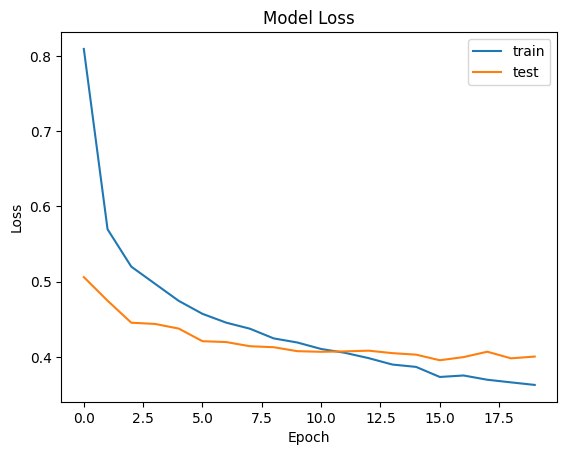

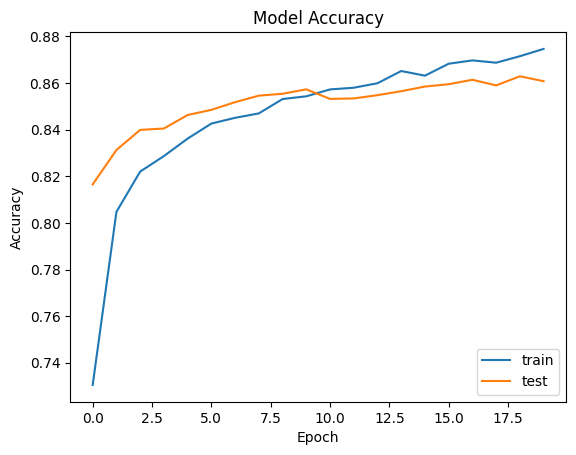

In [ ]:
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from keras import Sequential
from keras.optimizers import Adam

def get_model(pretrained_model, input_shape, num_classes):
    model = keras.Sequential()

    model.add(Input(shape=input_shape))
    model.add(pretrained_model)  # add pretrained_model as a blackbox
    model.add(Flatten(name='flatten'))
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


img_classes = enc_y_train[0].shape[1]

model = get_model(pretrained_model, IMAGE_SHAPE, img_classes)
history = model.fit(x_train, enc_y_train, epochs=20, batch_size=32, shuffle=True, validation_data=(x_test, enc_y_test), callbacks=[es])  #verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

In [ ]:
scaled_train_images = preprocess_input(train_images)
scaled_test_images = preprocess_input(test_images)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8076 - loss: 0.5528 - val_accuracy: 0.8464 - val_loss: 0.4195
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.8425 - loss: 0.4506 - val_accuracy: 0.8507 - val_loss: 0.4118
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8543 - loss: 0.4176 - val_accuracy: 0.8600 - val_loss: 0.3934
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8569 - loss: 0.4044 - val_accuracy: 0.8609 - val_loss: 0.3916
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8611 - loss: 0.3935 - val_accuracy: 0.8648 - val_loss: 0.3889
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8685 - loss: 0.3742 - val_accuracy: 0.8636 - val_loss: 0.3828
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8684 - loss: 0.3674 - val_accuracy: 0.8629 - val_loss: 0.3842
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8692 -

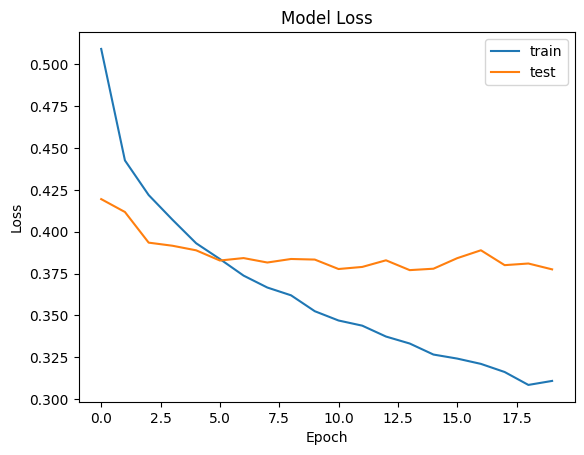

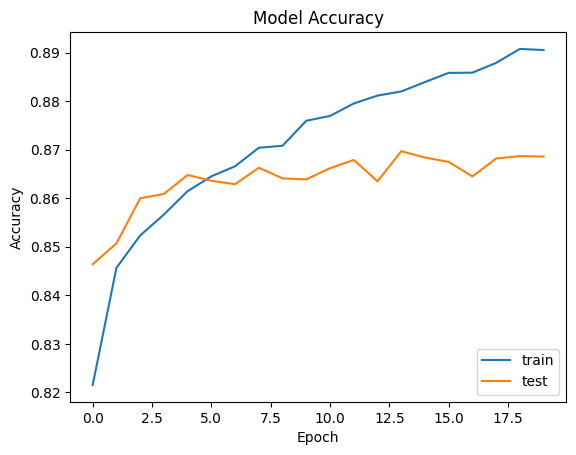

In [ ]:
history = model.fit(scaled_train_images, enc_train_labels, epochs=20, batch_size=32, shuffle=True, validation_data=(scaled_test_images, enc_test_labels), callbacks=[es])#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


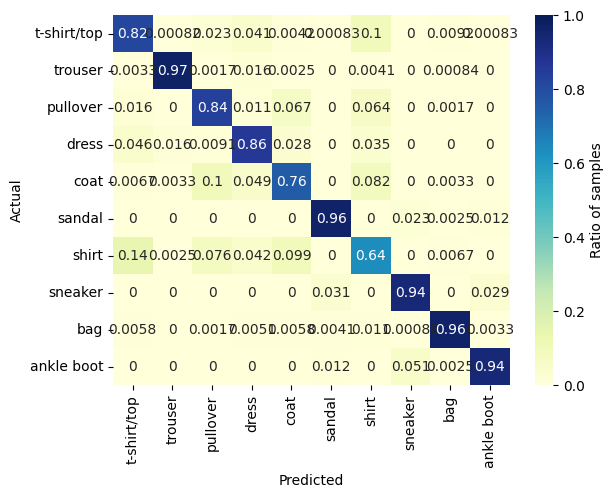

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1202
           1       0.98      0.97      0.97      1219
           2       0.80      0.84      0.82      1205
           3       0.84      0.86      0.85      1184
           4       0.78      0.76      0.77      1202
           5       0.95      0.96      0.96      1211
           6       0.68      0.64      0.66      1218
           7       0.93      0.94      0.93      1159
           8       0.97      0.96      0.97      1197
           9       0.95      0.94      0.95      1203

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [ ]:
# use trained classification model to predict classes on validation set
predicted = model.predict(scaled_val_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(val_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(val_labels, predicted))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


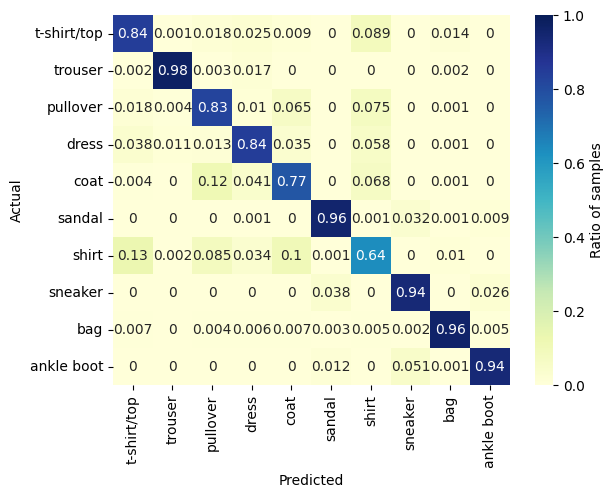

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.83      0.80      1000
           3       0.86      0.84      0.85      1000
           4       0.78      0.77      0.78      1000
           5       0.95      0.96      0.95      1000
           6       0.68      0.64      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
# use trained classification model to predict classes on test set
predicted = model.predict(scaled_test_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(test_labels, predicted))

In [ ]:
with open('performances.json', 'r') as json_file:
  perf = json.load(json_file)

perf["model_name"].append("vgg16")
perf["f1_macro"].append(metrics.f1_score(test_labels, predicted, average='macro'))
perf["accuracy"].append(metrics.accuracy_score(test_labels, predicted))
for c, s in zip(classes.values(), metrics.f1_score(test_labels, predicted, average=None)):
  perf["f1_"+c].append(s)

with open('performances.json', 'w') as f:
  output = json.dumps(perf)
  f.write(output)

perf

{'model_name': ['ResNet50', 'vgg16'],
 'f1_macro': [0.8626438196827463, 0.8681824325089311],
 'accuracy': [0.863, 0.8686],
 'f1_t-shirt/top': [0.8190110417666827, np.float64(0.8258317025440313)],
 'f1_trouser': [0.9724310776942355, np.float64(0.9789368104312939)],
 'f1_pullover': [0.7982107355864811, np.float64(0.8009685230024213)],
 'f1_dress': [0.8403779214321233, np.float64(0.8533872598584429)],
 'f1_coat': [0.7377919320594479, np.float64(0.77526395173454)],
 'f1_sandal': [0.9527127924340468, np.float64(0.9512437810945273)],
 'f1_shirt': [0.649402390438247, np.float64(0.6576903158984981)],
 'f1_sneaker': [0.9270680372001958, np.float64(0.9262741217219198)],
 'f1_bag': [0.9750499001996008, np.float64(0.964859437751004)],
 'f1_ankle boot': [0.9543823680164019, np.float64(0.9473684210526315)]}

**Application of LeNet-5 Model**

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7626 - loss: 0.7166 - val_accuracy: 0.8377 - val_loss: 0.4381
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8627 - loss: 0.3701 - val_accuracy: 0.8627 - val_loss: 0.3765
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8783 - loss: 0.3260 - val_accuracy: 0.8793 - val_loss: 0.3370
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8885 - loss: 0.2966 - val_accuracy: 0.8430 - val_loss: 0.4120
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8964 - loss: 0.2744 - val_accuracy: 0.8848 - val_loss: 0.3291
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9067 - loss: 0.2447 - val_accuracy: 0.8770 - val_loss: 0.3540
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9102 - loss: 0.2354 - val_accuracy: 0.8886 - val_loss: 0.3282
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9197 - loss: 0.217

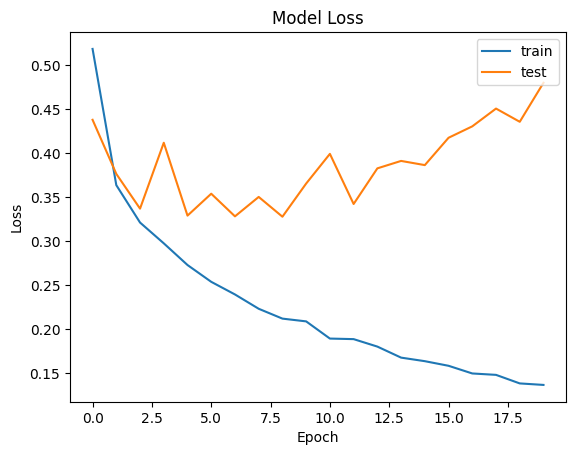

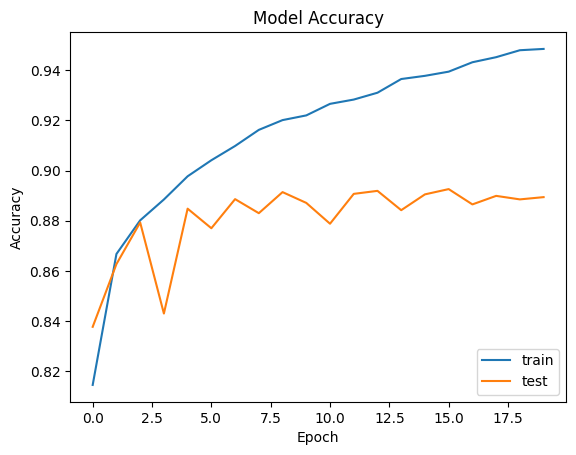

In [ ]:
from keras.layers import Input, Flatten, Dense, Conv2D, AveragePooling2D, Dropout
from keras import Sequential
from keras.optimizers import Adam

def get_model(input_shape, num_classes):


    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    #Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


img_classes = enc_y_train[0].shape[1]
model = get_model(IMAGE_SHAPE, img_classes)

#Train the model
history = model.fit(x_train, enc_y_train, epochs=20, batch_size=32, shuffle=True, validation_data=(x_test, enc_y_test), callbacks=[es])  # verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')


In [ ]:
import tensorflow as tf

#Resize the images
def resize_images(images, target_size):
    return tf.image.resize(images, target_size)


scaled_train_images = resize_images(scaled_train_images, target_size=(32, 32))


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6152 - loss: 4.4977 - val_accuracy: 0.7557 - val_loss: 0.7228
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7798 - loss: 0.6293 - val_accuracy: 0.8043 - val_loss: 0.5853
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8316 - loss: 0.4699 - val_accuracy: 0.8302 - val_loss: 0.4886
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8516 - loss: 0.4075 - val_accuracy: 0.8434 - val_loss: 0.4664
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8650 - loss: 0.3712 - val_accuracy: 0.8582 - val_loss: 0.4217
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8767 - loss: 0.3452 - val_accuracy: 0.8675 - val_loss: 0.4231
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8851 - loss: 0.3145 - val_accuracy: 0.8599 - val_loss: 0.4235
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8897 - loss: 0.3006

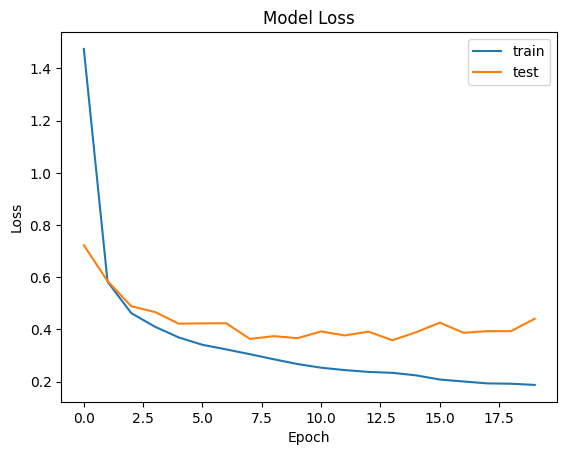

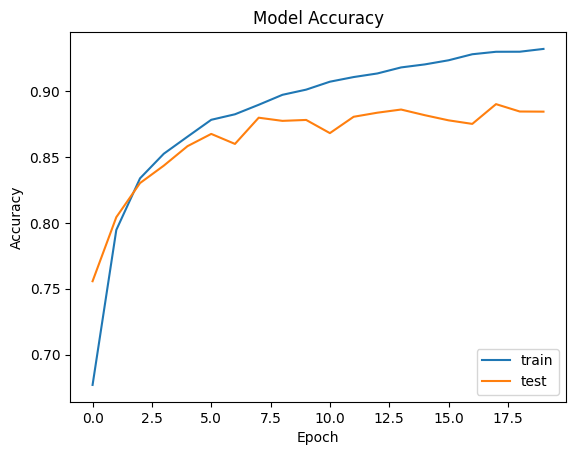

In [ ]:
history = model.fit(scaled_train_images, enc_train_labels, epochs=20, batch_size=32, shuffle=True, validation_data=(scaled_test_images, enc_test_labels), callbacks=[es])#, verbose=0)
plot_history(history, 'loss')
plot_history(history, 'accuracy')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


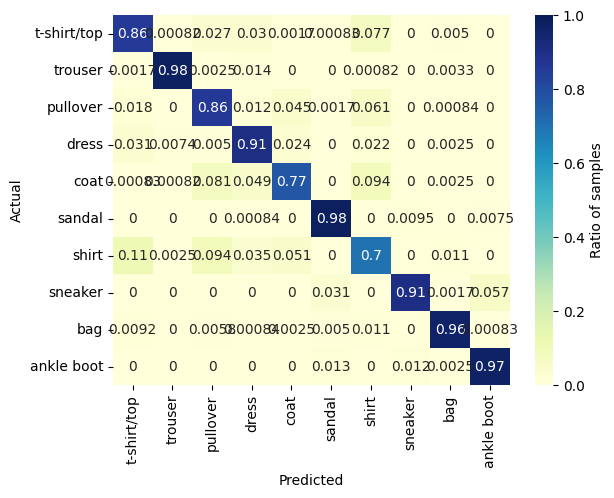

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1202
           1       0.99      0.98      0.98      1219
           2       0.80      0.86      0.83      1205
           3       0.86      0.91      0.88      1184
           4       0.86      0.77      0.81      1202
           5       0.95      0.98      0.97      1211
           6       0.72      0.70      0.71      1218
           7       0.98      0.91      0.94      1159
           8       0.97      0.96      0.97      1197
           9       0.94      0.97      0.95      1203

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [ ]:
# use trained classification model to predict classes on validation set
predicted = model.predict(scaled_val_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(val_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(val_labels, predicted))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


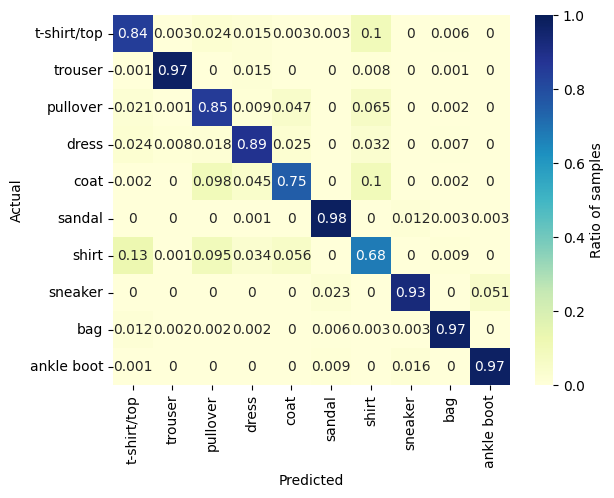

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.85      0.82      1000
           3       0.88      0.89      0.88      1000
           4       0.85      0.75      0.80      1000
           5       0.96      0.98      0.97      1000
           6       0.69      0.68      0.68      1000
           7       0.97      0.93      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [ ]:
# use trained classification model to predict classes on test set
predicted = model.predict(scaled_test_images)
# come back from one hot encoding to classes
predicted = nom_encoder.inverse_transform(predicted).flatten()

plot_confusion_matrix(test_labels, predicted, normalize=True, labels=classes.values())

print(metrics.classification_report(test_labels, predicted))

In [ ]:
with open('performances.json', 'r') as json_file:
  perf = json.load(json_file)

perf["model_name"].append("LeNet-5")
perf["f1_macro"].append(metrics.f1_score(test_labels, predicted, average='macro'))
perf["accuracy"].append(metrics.accuracy_score(test_labels, predicted))
for c, s in zip(classes.values(), metrics.f1_score(test_labels, predicted, average=None)):
  perf["f1_"+c].append(s)

with open('performances.json', 'w') as f:
  output = json.dumps(perf)
  f.write(output)

perf

{'model_name': ['ResNet50', 'vgg16', 'LeNet-5'],
 'f1_macro': [0.8626438196827463, 0.8681824325089311, 0.8841588619369475],
 'accuracy': [0.863, 0.8686, 0.8844],
 'f1_t-shirt/top': [0.8190110417666827,
  0.8258317025440313,
  np.float64(0.8316929133858267)],
 'f1_trouser': [0.9724310776942355,
  0.9789368104312939,
  np.float64(0.9798994974874372)],
 'f1_pullover': [0.7982107355864811,
  0.8009685230024213,
  np.float64(0.8173996175908221)],
 'f1_dress': [0.8403779214321233,
  0.8533872598584429,
  np.float64(0.8829098156452416)],
 'f1_coat': [0.7377919320594479,
  0.77526395173454,
  np.float64(0.7993630573248408)],
 'f1_sandal': [0.9527127924340468,
  0.9512437810945273,
  np.float64(0.9703264094955489)],
 'f1_shirt': [0.649402390438247,
  0.6576903158984981,
  np.float64(0.6830985915492958)],
 'f1_sneaker': [0.9270680372001958,
  0.9262741217219198,
  np.float64(0.9463464486458866)],
 'f1_bag': [0.9750499001996008, 0.964859437751004, np.float64(0.97)],
 'f1_ankle boot': [0.954382368

In [ ]:
gc.collect()

30252

In [ ]:
import pandas as pd

df_perf = pd.DataFrame.from_dict(perf)
df_perf

,model_name,f1_macro,accuracy,f1_t-shirt/top,f1_trouser,f1_pullover,f1_dress,f1_coat,f1_sandal,f1_shirt,f1_sneaker,f1_bag,f1_ankle boot
0,ResNet50,0.862644,0.8630,0.819011,0.972431,0.798211,0.840378,0.737792,0.952713,0.649402,0.927068,0.975050,0.954382
1,vgg16,0.868182,0.8686,0.825832,0.978937,0.800969,0.853387,0.775264,0.951244,0.657690,0.926274,0.964859,0.947368
2,LeNet-5,0.884159,0.8844,0.831693,0.979899,0.817400,0.882910,0.799363,0.970326,0.683099,0.946346,0.970000,0.960552


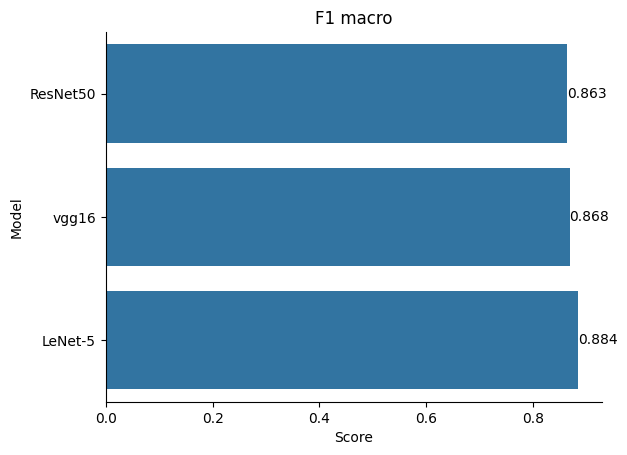

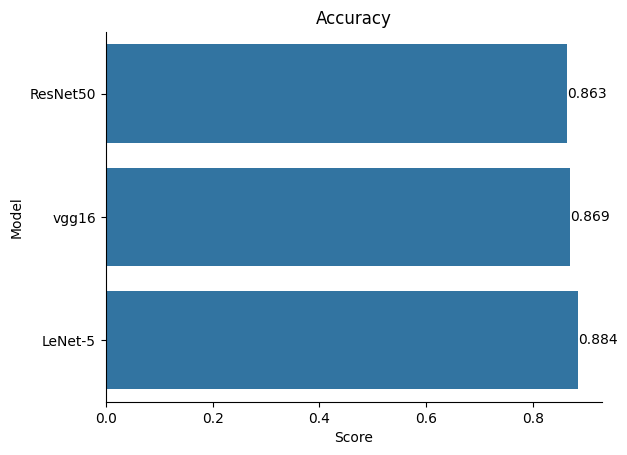

In [ ]:
# plot f1 macro
ax = sns.barplot(df_perf, x="f1_macro", y="model_name")
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f')
plt.title("F1 macro")
plt.xlabel("Score")
plt.ylabel("Model")
sns.despine()
plt.show()

# plot accuracy
ax = sns.barplot(df_perf, x="accuracy", y="model_name")
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f')
plt.title("Accuracy")
plt.xlabel("Score")
plt.ylabel("Model")
sns.despine()
plt.show()

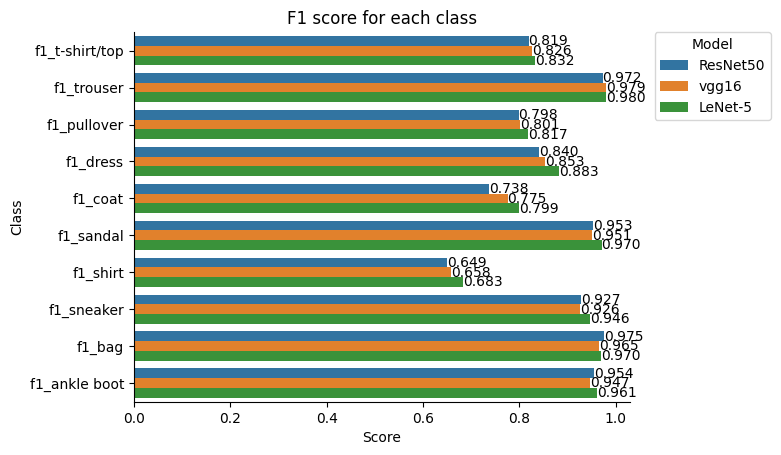

In [ ]:
# plot F1 score for each class
df_classes = df_perf[["model_name"] + ["f1_"+c for c in classes.values()]].copy()
df_classes = pd.melt(df_classes, id_vars=["model_name"], value_vars=df_classes.columns[1:])

ax = sns.barplot(df_classes, x="value", y="variable", hue="model_name")
for i in ax.containers:
  ax.bar_label(i, fontsize=10, fmt='%.3f')
plt.title("F1 score for each class")
plt.xlabel("Score")
plt.ylabel("Class")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), title="Model", loc='upper left', borderaxespad=0)
plt.show()